# Week 4 handin

## 04 Assignment
#### Ex 1 NumPy

    1. Open the file './befkbhalderstatkode.csv'
    2. Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
    3. Using this data:
        neighb = {
            1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
            5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
            10: 'Amager Vest', 99: 'Udenfor'
        }
        Find out how many people lived in each of the 11 areas in 2015
    4. Make a bar plot to show the size of each city area from the smallest to the largest
    5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
    6. How many of those were from the other nordic countries (not dk)
    7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

## 02 Status
    I completed all the steps of the exercises.

## 03 Solutions

In [1]:
# Open the file './befkbhalderstatkode.csv'

#%%bash
#head ../../data/befkbhalderstatkode.csv

In [2]:
# Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
import numpy as np

filename = '../../data/befkbhalderstatkode.csv'
bef_kbh_alder_statskode = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
dd = bef_kbh_alder_statskode

In [3]:
# Find out how many people lived in each of the 11 areas in 2015
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}

def get_people_count_from_areas(neighborhoods, mask):
    sum_of_people = {}
    for neighborhood in neighborhoods.keys():
        people = dd[mask & (dd[:,1] == neighborhood)] 
        sum_of_people[neighborhoods[neighborhood]] = people[:,4].sum()
    return sum_of_people

def print_dict(dict):
    for key, value in dict.items():
        print(key, ":" ,value)

year = 2015
mask = (dd[:,0] == year)

print_dict(get_people_count_from_areas(neighb, mask))


Indre By : 51937
Østerbro : 75113
Nørrebro : 78802
Vesterbro/Kgs. Enghave : 61623
Valby : 51727
Vanløse : 39537
Brønshøj-Husum : 43908
Bispebjerg : 53604
Amager Øst : 55205
Amager Vest : 64967
Udenfor : 3872


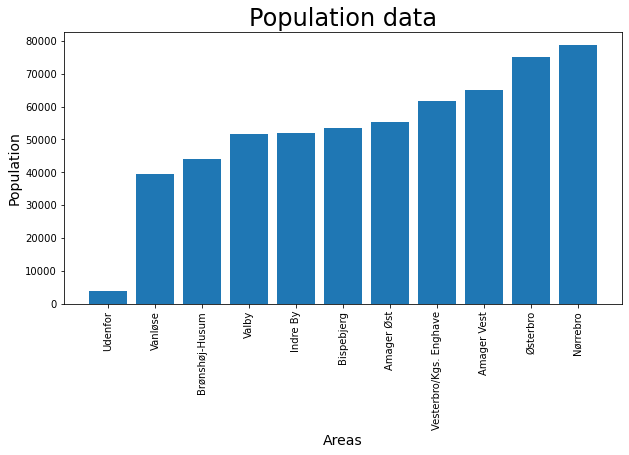

In [4]:
# Make a bar plot to show the size of each city area from the smallest to the largest
import matplotlib.pyplot as plt

year = 2015
mask = (dd[:,0] == year)

data = get_people_count_from_areas(neighb, mask)
population = sorted(data.values()) 
areas = sorted(data, key=data.get)

plt.figure(figsize=(10,5))
plt.bar(areas, population)
plt.title("Population data", fontsize=24)
plt.xlabel("Areas", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("Population", fontsize=14)
plt.show(block=True)





In [5]:
# Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

year = 2015
age = 65
mask = (dd[:,0] == year) & (dd[:,2] > age)

print_dict(get_people_count_from_areas(neighb, mask))


Indre By : 6818
Østerbro : 8370
Nørrebro : 5059
Vesterbro/Kgs. Enghave : 3984
Valby : 5397
Vanløse : 4668
Brønshøj-Husum : 5461
Bispebjerg : 4945
Amager Øst : 5027
Amager Vest : 5971
Udenfor : 50


In [6]:
# How many of those were from the other nordic countries (not dk)

year = 2015
age = 65
statsCode = 5100
mask = (dd[:,0] == year) & (dd[:,2] > age) & (dd[:,3] != statsCode)

print_dict(get_people_count_from_areas(neighb, mask))


Indre By : 332
Østerbro : 430
Nørrebro : 582
Vesterbro/Kgs. Enghave : 405
Valby : 263
Vanløse : 149
Brønshøj-Husum : 337
Bispebjerg : 395
Amager Øst : 213
Amager Vest : 331
Udenfor : 14


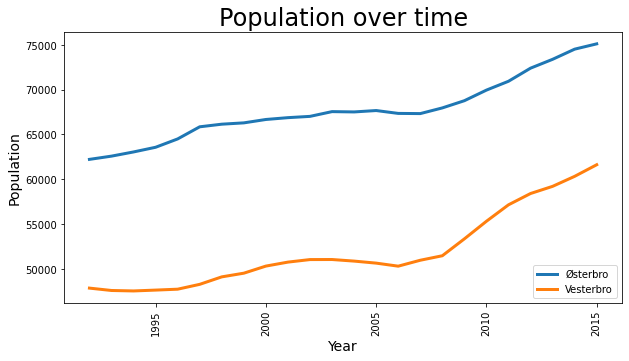

In [7]:
# Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

bydel_østerbro = (dd[:,1] == 2) 
bydel_vesterbro = (dd[:,1] == 4) 
set_of_years = np.unique(dd[:,0])
østerbro = np.array([np.sum(dd[bydel_østerbro & (dd[:,0] == year)][:,4]) 
                      for year in set_of_years])
vesterbro = np.array([np.sum(dd[bydel_vesterbro & (dd[:,0] == year)][:,4]) 
                      for year in set_of_years])


plt.figure(figsize=(10,5))
p1 = plt.plot(set_of_years, østerbro, linewidth=3, label="Østerbro")
p2 = plt.plot(set_of_years, vesterbro, linewidth=3, label="Vesterbro")
plt.title("Population over time", fontsize=24)
plt.xlabel("Year", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("Population", fontsize=14)
plt.legend(loc=4)
plt.show(block=True)